In [13]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# quandl.ApiConfig.api_key = 'Y-H934WKrXb_vXgP_x13'

In [14]:
start=pd.to_datetime('2012-01-01')
end=pd.to_datetime('2017-01-01')

In [22]:
quandl.ApiConfig.api_key = "Y-H934WKrXb_vXgP_x13"
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [28]:
aapl.iloc[0]['Adj. Close']

52.848786580038

In [29]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normal Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [30]:
aapl.head()

,Adj. Close,Normal Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [31]:
aapl.tail()

,Adj. Close,Normal Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [42]:
# 30% in apple
# 20% in cisco
# 40% in amazon
# 10% in ibm



for stock_df,allo in zip((aapl,cisco,ibm,amzn),[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normal Return']*allo
     

In [43]:
aapl.head()

,Adj. Close,Normal Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [44]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [45]:
aapl.head()

,Adj. Close,Normal Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [48]:
all_pos_vals = [aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']]
portfolio_val = pd.concat(all_pos_vals,axis=1)

In [49]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [50]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

In [51]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [52]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


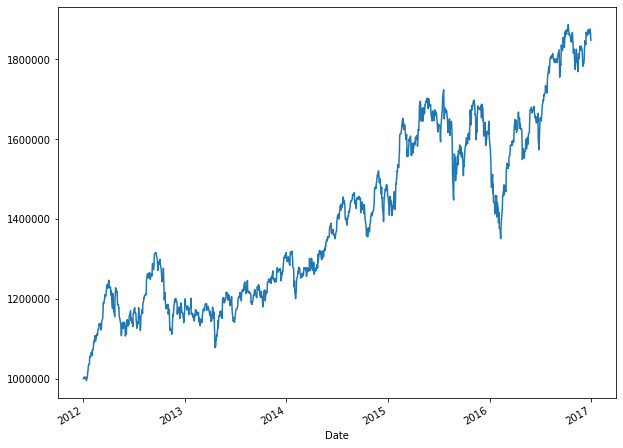

In [53]:
portfolio_val['Total Pos'].plot(figsize=(10,8))

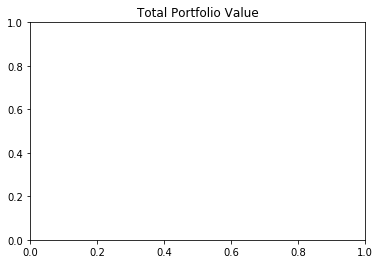

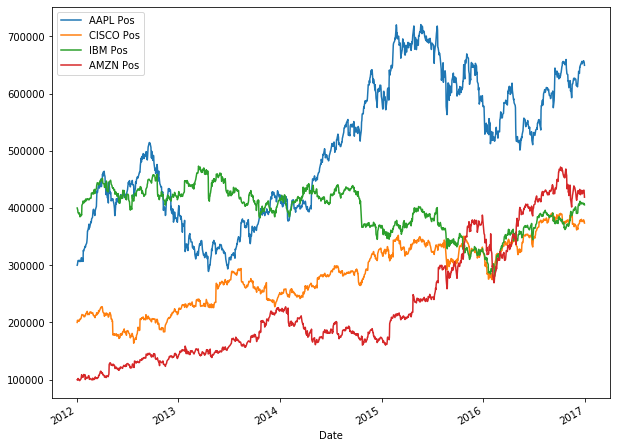

In [55]:
plt.title('Total Portfolio Value')
portfolio_val.drop('Total Pos',axis=1).plot(figsize=(10,8))